# 2010 Baja CA EQ: QTM Catalog MagFreqDist



In [1]:
# IMPORT CELL; updated 2/8/21

import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore') 
from importlib import reload
import time
import math
import scipy.stats as stats
import os
from datetime import datetime

import obspy
from obspy.core import UTCDateTime
from obspy import read

import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy import feature as cfeature
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE, OCEAN, LAKES, BORDERS
import matplotlib.ticker as mticker

time = datetime.now()
print("Imported!" + str(time))

Imported!2021-03-05 15:05:08.218376


In [2]:
%%time
QTM_Range = pd.read_pickle("QTM_Range.pkl")
QTM_Range

Wall time: 666 ms


,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,EVENTID,LATITUDE,LONGITUDE,DEPTH,...,TEMPLATEID,STACKCC,MAD,RELOCATED?,POSIX TIME,TIMESTAMP,VECTORIZATION,VTIMESTAMP,RELATIVE DAY,RELATIVE HOUR
341563,2010,3,5,22,40,56.570,332205,33.63921,-116.69371,16.395,...,11023517,0.208,0.021,0,2010-03-05T22:40:56.570000Z,1.267829e+09,2010-03-05T22:40:56.570000Z,1.267829e+09,-30.0,-720.0
341564,2010,3,5,22,44,28.810,332206,33.00096,-116.33812,8.098,...,14599964,0.274,0.024,0,2010-03-05T22:44:28.810000Z,1.267829e+09,2010-03-05T22:44:28.809999Z,1.267829e+09,-30.0,-720.0
341565,2010,3,5,22,59,35.670,332207,33.68388,-116.70518,16.740,...,9715717,0.182,0.019,0,2010-03-05T22:59:35.670000Z,1.267830e+09,2010-03-05T22:59:35.670000Z,1.267830e+09,-30.0,-720.0
341566,2010,3,5,23,22,38.272,14597244,33.89683,-116.20141,9.967,...,14597244,1.0,0.01,1,2010-03-05T23:22:38.272000Z,1.267831e+09,2010-03-05T23:22:38.271999Z,1.267831e+09,-30.0,-719.0
341567,2010,3,5,23,37,37.430,332209,33.17265,-115.61604,2.806,...,11247074,0.191,0.02,0,2010-03-05T23:37:37.430000Z,1.267832e+09,2010-03-05T23:37:37.429999Z,1.267832e+09,-30.0,-719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479972,2010,5,4,22,34,42.330,14693572,32.22300,-115.27750,8.680,...,14693572,1.0,0.01,0,2010-05-04T22:34:42.330000Z,1.273012e+09,2010-05-04T22:34:42.329999Z,1.273012e+09,30.0,720.0
479973,2010,5,4,22,35,48.290,14693580,32.20351,-115.25989,3.764,...,14693580,1.0,0.01,1,2010-05-04T22:35:48.290000Z,1.273013e+09,2010-05-04T22:35:48.289999Z,1.273013e+09,30.0,720.0
479974,2010,5,4,22,36,27.620,36905559,32.65953,-115.79090,8.256,...,36905559,1.0,0.01,0,2010-05-04T22:36:27.620000Z,1.273013e+09,2010-05-04T22:36:27.620000Z,1.273013e+09,30.0,720.0
479975,2010,5,4,22,37,25.670,465027,33.72415,-116.82370,17.104,...,14063504,0.233,0.019,0,2010-05-04T22:37:25.670000Z,1.273013e+09,2010-05-04T22:37:25.670000Z,1.273013e+09,30.0,720.0


## Magnitude Frequency Distribution

#### At or less than

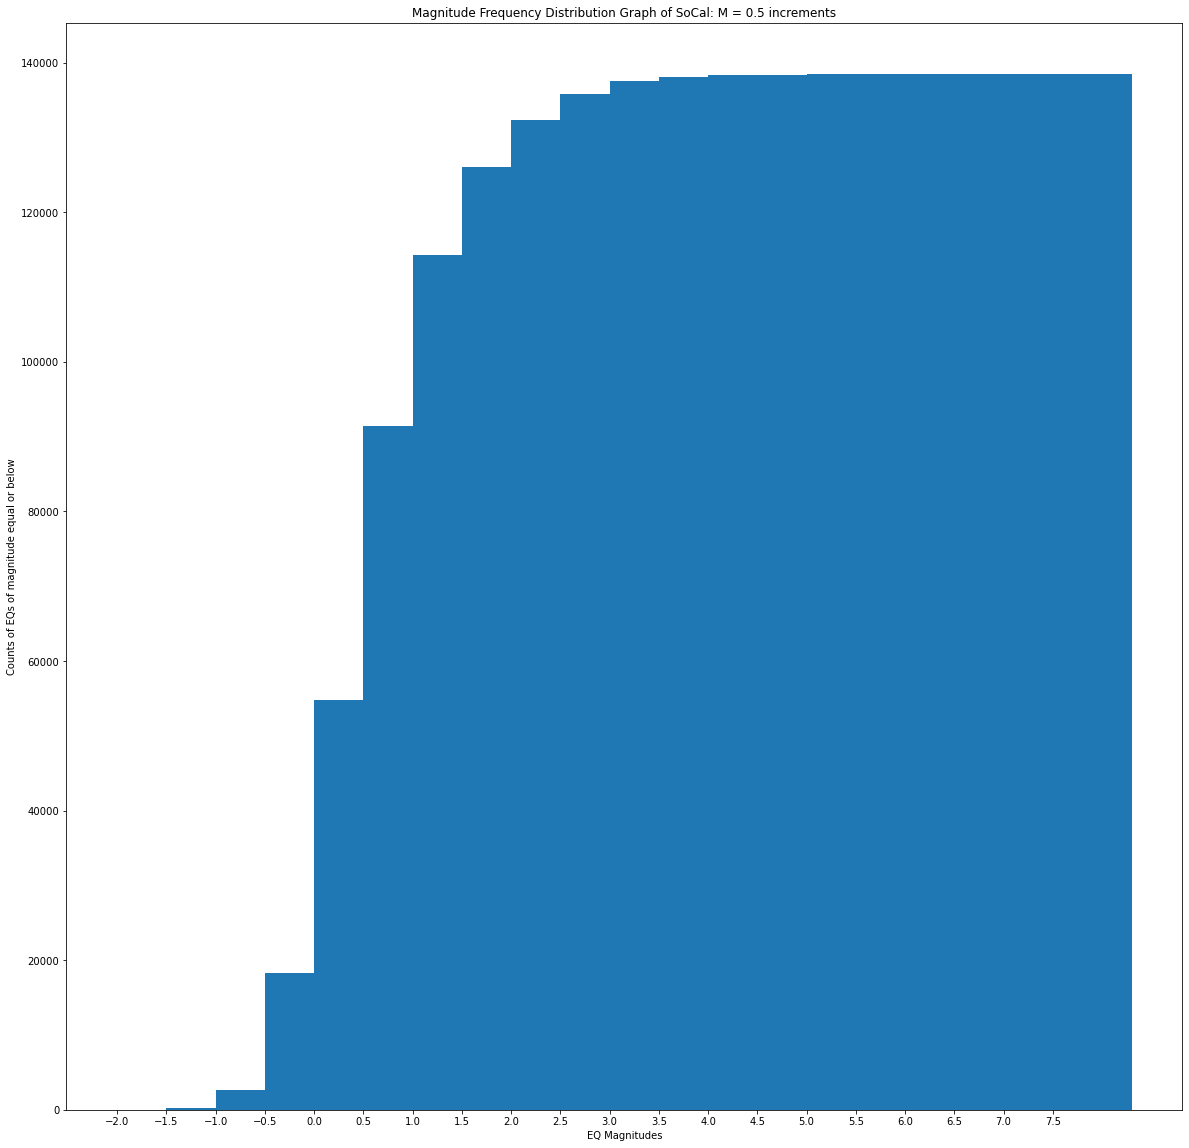

In [3]:
# 2: Magnitude frequency 
# EQ magnitudes vs. the number of EQs equal to or smaller than that magnitude
# Histogram? Try bar graph

MagList = np.arange(-2.0, 8.0, step = 0.5) # every magnitude from -2.0 to 8.0, increment by 0.5
MagFreqDistList = [] # Create a list of magnitudes' heights for the bar graph
for i in MagList: # Step through magnitudes
    temp = len(QTM_Range.loc[QTM_Range["MAGNITUDE"] <= i]) # temporary variable = count of EQs at or less than the M
    MagFreqDistList.append(temp) # append this count to our new list
#len(MagFreqDistList)
# This equals 20
plt.figure(figsize = (20, 20));
plt.bar(x = MagList, height = MagFreqDistList, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Counts of EQs of magnitude equal or below");
plt.xticks(MagList);
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.5 increments");

path = "Magnitude Frequency/"
#os.mkdir(path)
file = "MagFreqDistLess_1.png"
filename = os.path.join(path + file)
plt.savefig(filename, facecolor = "white");

In [4]:
%%time
# Magnitude frequency 
# EQ magnitudes vs. the number of EQs equal to or smaller than that magnitude for Baja EQ range
# Histogram? Try bar graph

MagList2 = np.arange(-2.0, 8.0, step = 0.1) # every magnitude from -2.0 to 8.0, increment by 0.1
MagList2 = list(MagList2)
MagFreqDistList2 = [] # Create a list of magnitudes' heights for the bar graph
for i in MagList2: # Step through magnitudes
    temp = len(QTM_Range.loc[QTM_Range["MAGNITUDE"] <= i]) # temporary variable = count of EQs at or less than the M
    MagFreqDistList2.append(temp) # append this count to our new list
#len(MagFreqDistList2)
# This equals 20

Wall time: 3.88 s


In [5]:
MagList2[:10]
MagFreqDistList2[0:10]

[0, 10, 23, 48, 107, 195, 346, 627, 1024, 1668]

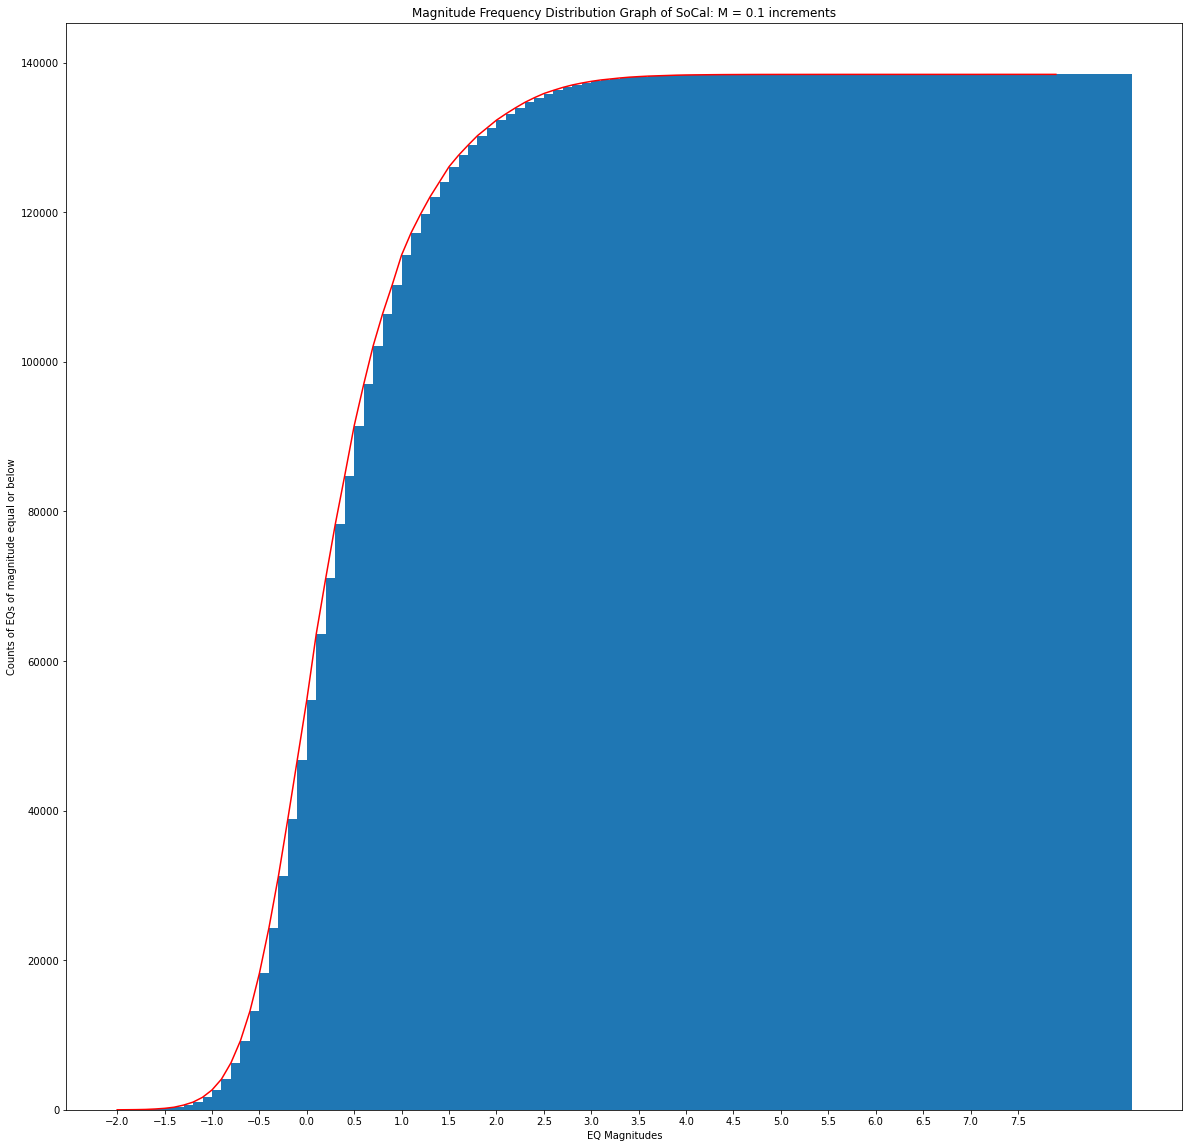

In [6]:
plt.figure(figsize = (20, 20));
plt.bar(x = MagList2, height = MagFreqDistList2, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Counts of EQs of magnitude equal or below");
plt.xticks(np.arange(min(MagList2), max(MagList2), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

plt.plot(MagList2, MagFreqDistList2, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");
plt.savefig("Magnitude Frequency/" + "MagFreqDistLess_2.png", facecolor = "white");

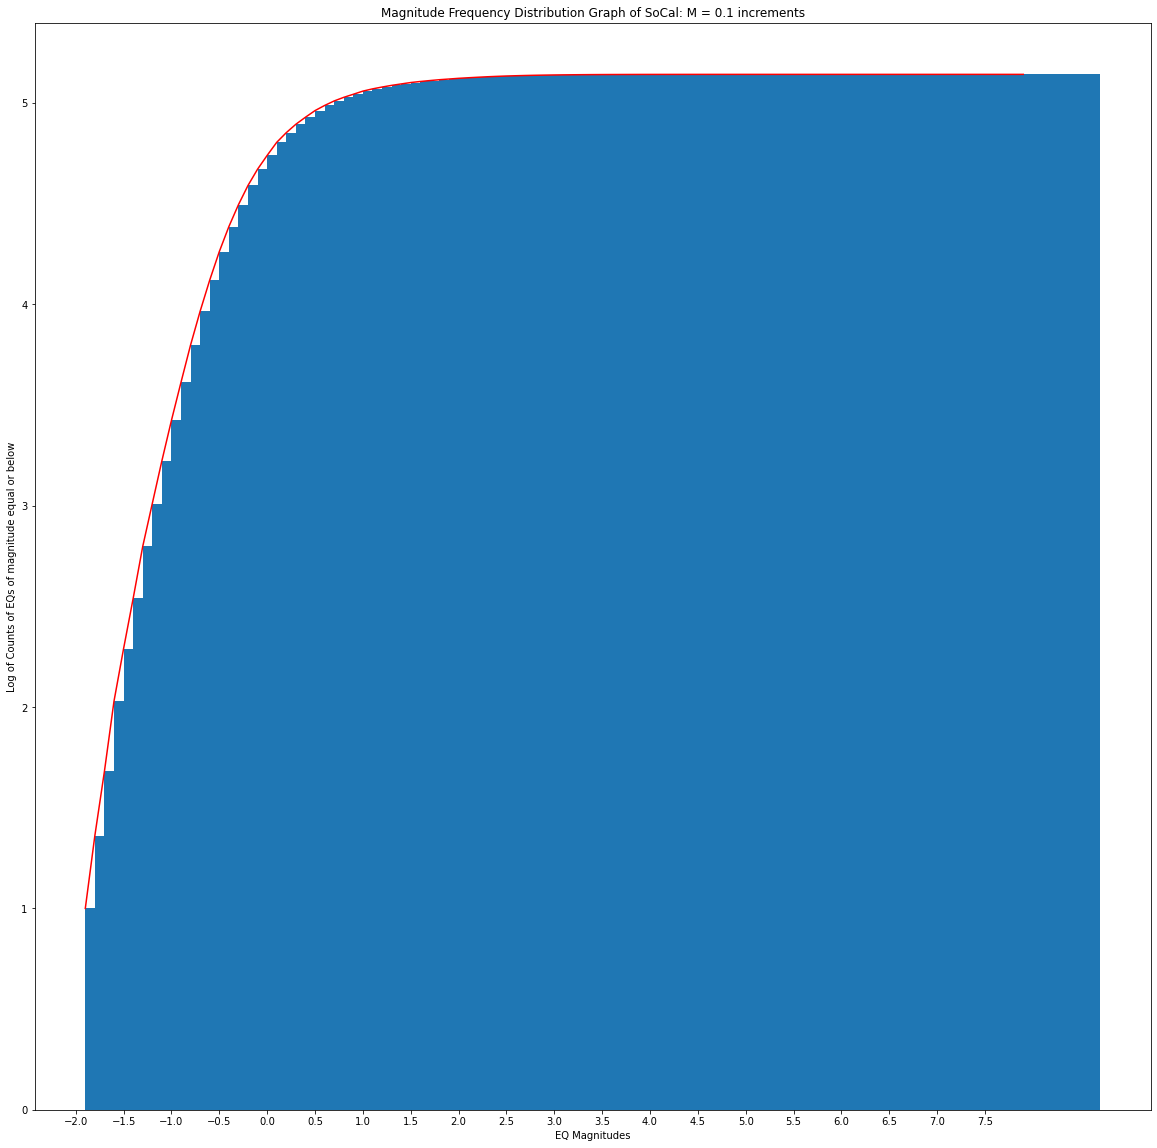

In [7]:
MagFreqDistList2LOG = np.log10(MagFreqDistList2)

plt.figure(figsize = (20, 20));
plt.bar(x = MagList2, height = MagFreqDistList2LOG, align = "edge");
plt.xlabel("EQ Magnitudes");
plt.ylabel("Log of Counts of EQs of magnitude equal or below");
plt.xticks(np.arange(min(MagList2), max(MagList2), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

plt.plot(MagList2, MagFreqDistList2LOG, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");

plt.savefig("Magnitude Frequency/" + "MagFreqDistLess_3.png", facecolor = "white");

#### At or greater than

In [8]:
%%time
# Magnitude frequency 
# EQ magnitudes vs. the number of EQs equal to or GREATER than that magnitude for Baja EQ range
# Histogram? Try bar graph

MagList3 = np.arange(-2.0, 8.0, step = 0.1) # every magnitude from -2.0 to 8.0, increment by 0.1
MagList3 = list(MagList3)
MagFreqDistList3 = [] # Create a list of magnitudes' heights for the bar graph
for i in MagList3: # Step through magnitudes
    temp = len(QTM_Range.loc[QTM_Range["MAGNITUDE"] >= i]) 
    # temporary variable = count of EQs at or GREATER than the M
    MagFreqDistList3.append(temp) # append this count to our new list
#len(MagFreqDistList3)
# This equals 20

Wall time: 1.4 s


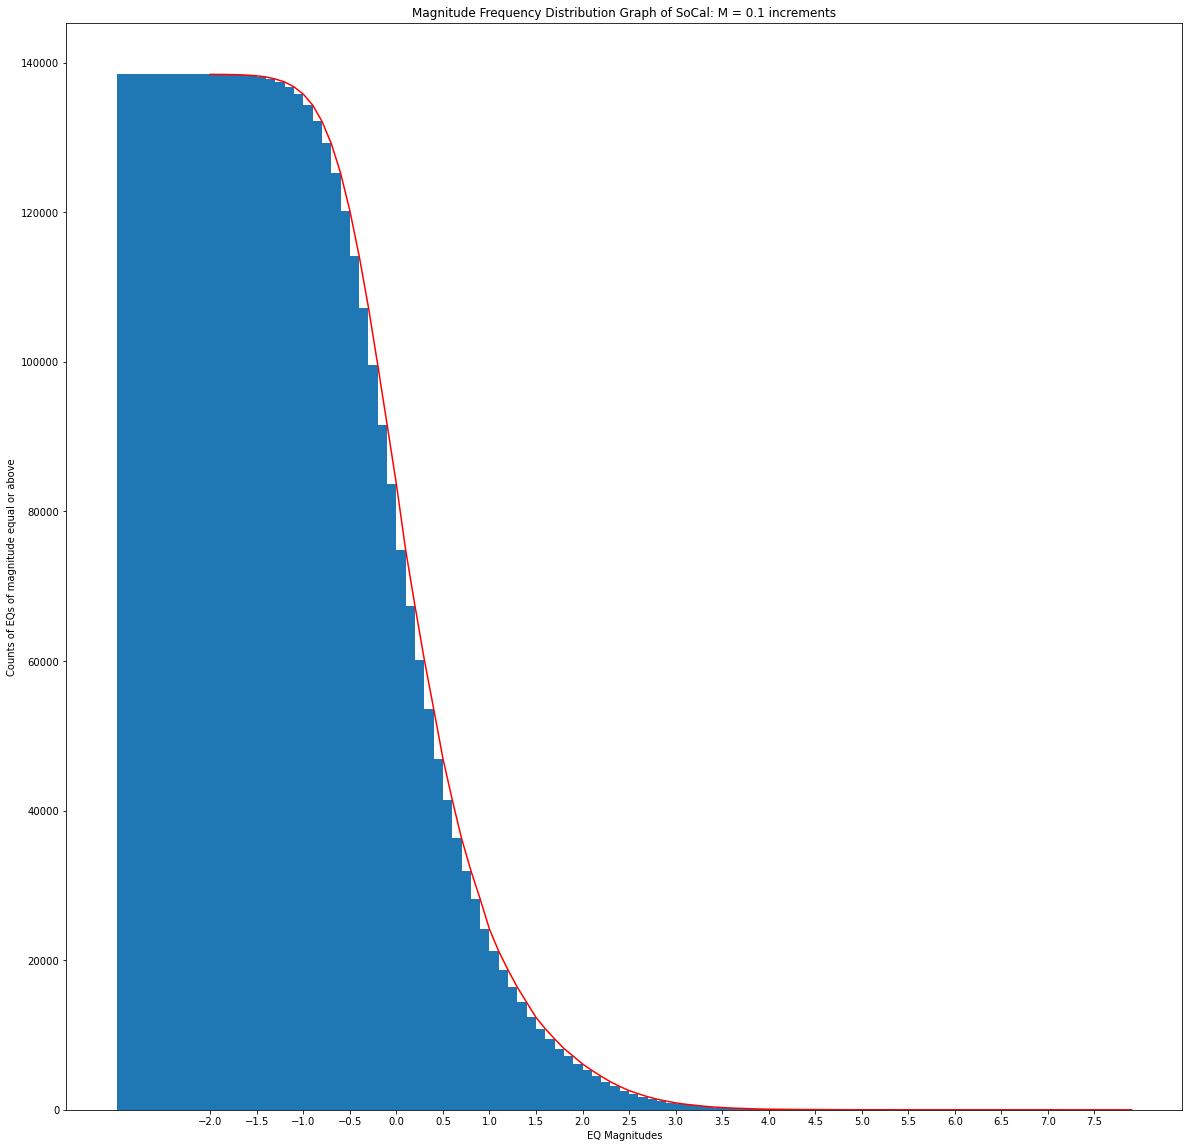

In [9]:
plt.figure(figsize = (20, 20));
plt.bar(x = MagList3, height = MagFreqDistList3, align = "edge", width = -1);
plt.xlabel("EQ Magnitudes");
plt.ylabel("Counts of EQs of magnitude equal or above");
plt.xticks(np.arange(min(MagList3), max(MagList3), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

plt.plot(MagList3, MagFreqDistList3, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList3, label = "Seaborn best-fit", color = "red");
plt.savefig("Magnitude Frequency/" + "MagFreqDistGreater_1.png", facecolor = "white");

In [10]:
# Updated 2/23; log10, not ln
MagFreqDistList3LOG = np.log10(MagFreqDistList3)
MagFreqDistList3LOG

#MagFreqDistList3LOG = MagFreqDistList3LOG[MagFreqDistList3LOG>0]
# remove -inf values; need to set to 0 instead of removing to keep shape
MagFreqDistList3LOG[MagFreqDistList3LOG<0] = 0
MagFreqDistList3LOG

array([ 5.14118316,  5.14115806,  5.14111099,  5.14103252,  5.1408473 ,
        5.14057089,  5.14009618,  5.1392114 ,  5.13795828,  5.13591781,
        5.13279102,  5.12813098,  5.12103102,  5.11119864,  5.09773612,
        5.07981774,  5.05740743,  5.03029605,  4.99795837,  4.96185754,
        4.92226861,  4.87372738,  4.82815056,  4.77928617,  4.72943209,
        4.67166335,  4.61735686,  4.55966728,  4.5049192 ,  4.44975601,
        4.38268329,  4.32582342,  4.27126061,  4.21388947,  4.15697294,
        4.09127996,  4.03430753,  3.97648754,  3.91349596,  3.85515558,
        3.78682238,  3.7219754 ,  3.65118106,  3.5728716 ,  3.49401537,
        3.40857913,  3.3300077 ,  3.24179543,  3.15167623,  3.06370856,
        2.96988164,  2.87506126,  2.79098848,  2.68574174,  2.57403127,
        2.47712125,  2.36735592,  2.2787536 ,  2.17318627,  2.02938378,
        1.90848502,  1.81291336,  1.72427587,  1.60205999,  1.49136169,
        1.39794001,  1.30103   ,  1.14612804,  1.04139269,  1.  

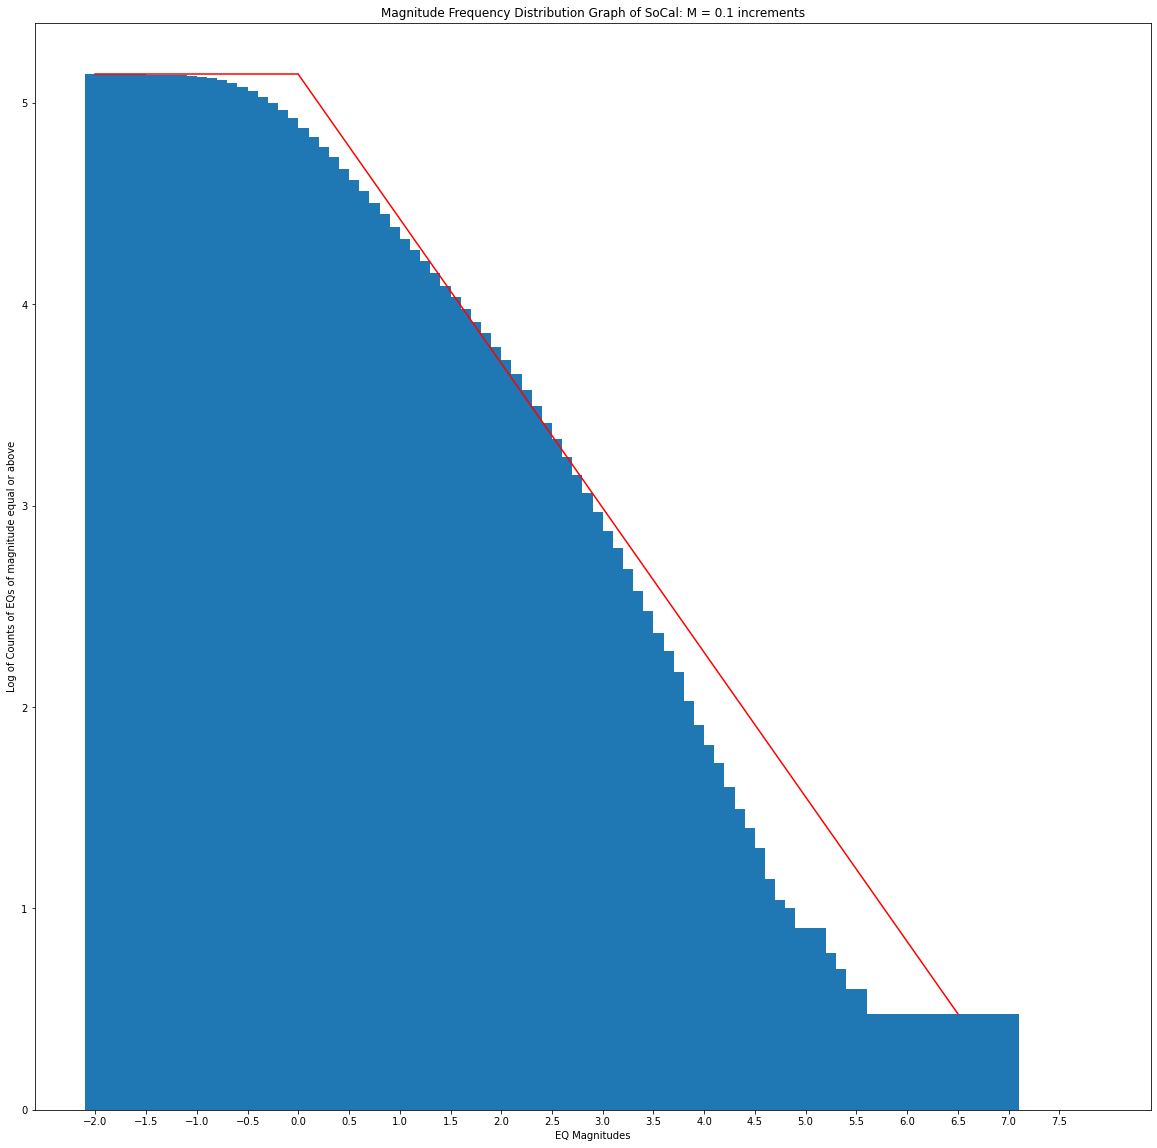

In [11]:


plt.figure(figsize = (20, 20));
plt.bar(x = MagList3, height = MagFreqDistList3LOG, align = "edge", width = -0.1);
plt.xlabel("EQ Magnitudes");
plt.ylabel("Log of Counts of EQs of magnitude equal or above");
plt.xticks(np.arange(min(MagList3), max(MagList3), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

#plt.axhline(y = 1, xmin = 0, xmax = 0.1, color = "red")
#plt.plot(MagList3, MagFreqDistList3LOG, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");


plt.plot([-2, 0], [MagFreqDistList3LOG[0], MagFreqDistList3LOG[0]], color = "red");
# Horizontal line
plt.plot([0, 6.5], [MagFreqDistList3LOG[0], MagFreqDistList3LOG[-9]], color = "red")
# Second best-fit line

plt.savefig("Magnitude Frequency/" + "MagFreqDistGreater_2.png", facecolor = "white");

y = mx + b, Best-fitting slope (m) d y-intercept (b): [-0.64473729  4.67089452]
b-value from MagFreqDistList3LOG:  0.64473729446


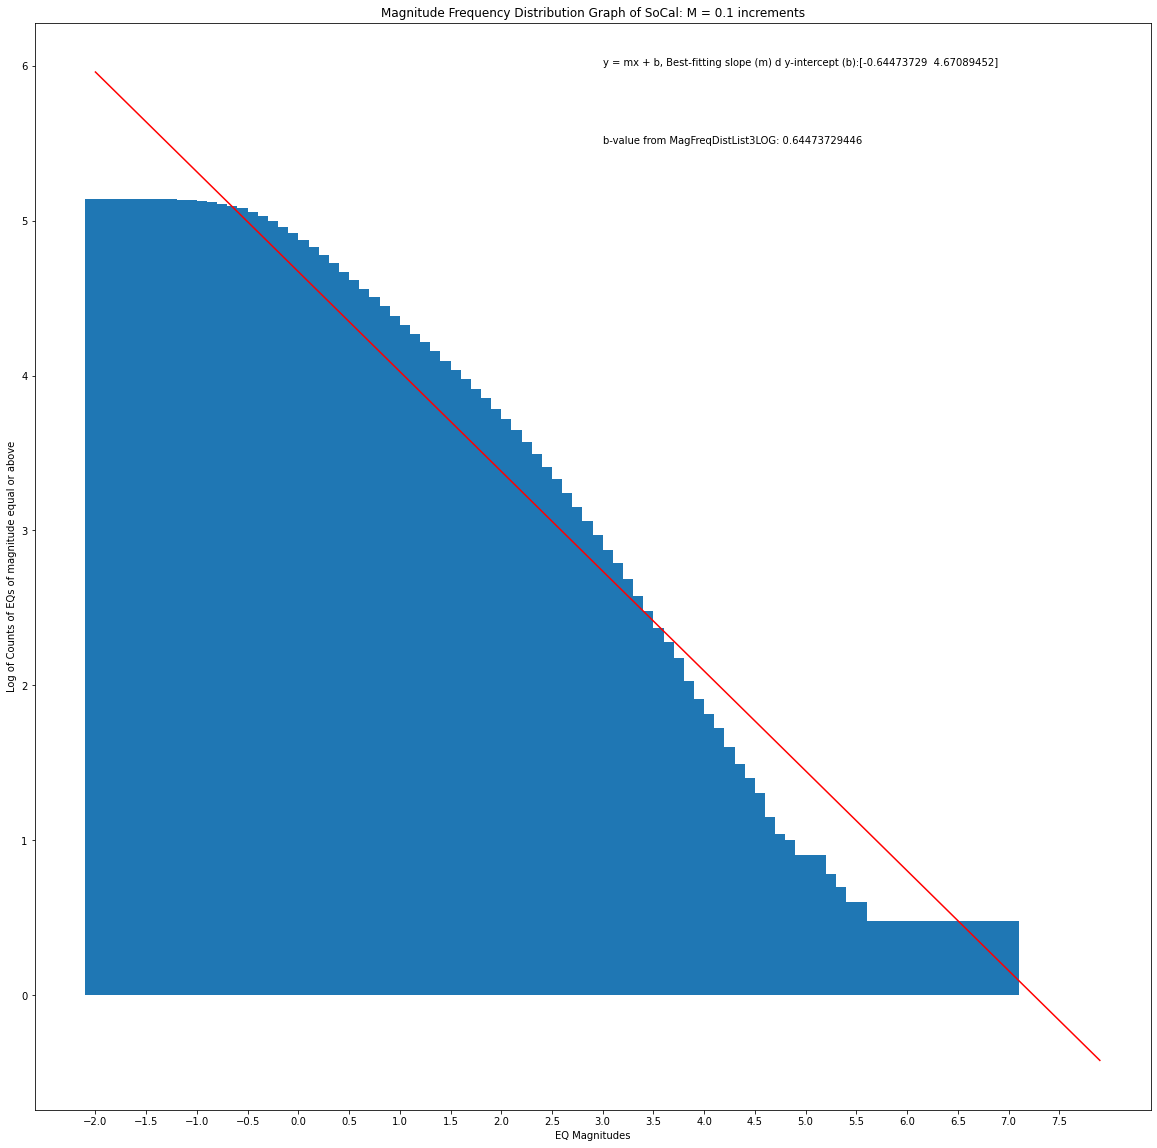

In [12]:
# 2/16 best-fit line

plt.figure(figsize = (20, 20));
plt.bar(x = MagList3, height = MagFreqDistList3LOG, align = "edge", width = -0.1);

# Scatter
#plt.scatter(x = MagList3, y = MagFreqDistList3LOG);

plt.xlabel("EQ Magnitudes");
plt.ylabel("Log of Counts of EQs of magnitude equal or above");
plt.xticks(np.arange(min(MagList3), max(MagList3), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

#plt.axhline(y = 1, xmin = 0, xmax = 0.1, color = "red")
#plt.plot(MagList3, MagFreqDistList3LOG, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");


#plt.plot([-2, 1], [MagFreqDistList3LOG[0], MagFreqDistList3LOG[0]], color = "red");
# Horizontal line
#plt.plot([1, 6.5], [MagFreqDistList3LOG[0], MagFreqDistList3LOG[-9]], color = "red")
# Second best-fit line

# np.polyfit
M_B = np.polyfit(MagList3, list(MagFreqDistList3LOG), 1) 
# "polynomial" regression line, 1 degree
# (x, y, 1)
Model1 = np.polyval(M_B, MagList3)
plt.plot(MagList3, Model1, "r-");
# (, x)

print("y = mx + b, Best-fitting slope (m) d y-intercept (b):", M_B)
print("b-value from MagFreqDistList3LOG: ", -M_B[0])
plt.text(3, 6, "y = mx + b, Best-fitting slope (m) d y-intercept (b):"+str(M_B))
plt.text(3, 5.5, "b-value from MagFreqDistList3LOG: "+str(-M_B[0]))

plt.savefig("Magnitude Frequency/" + "MagFreqDistGreater_3.png", facecolor = "white");

In [13]:
MagList3Trunc = MagList3[16:-22]
MagFreqDistList3LOGTrunc = MagFreqDistList3LOG[16:-22]
len(MagList3)
len(MagFreqDistList3LOG)

100

y = mx + b, Best-fitting slope (m) d y-intercept (b: [-0.80261711  5.16149117]
b-value from MagFreqDistList3LOGTrunc:  0.802617114796


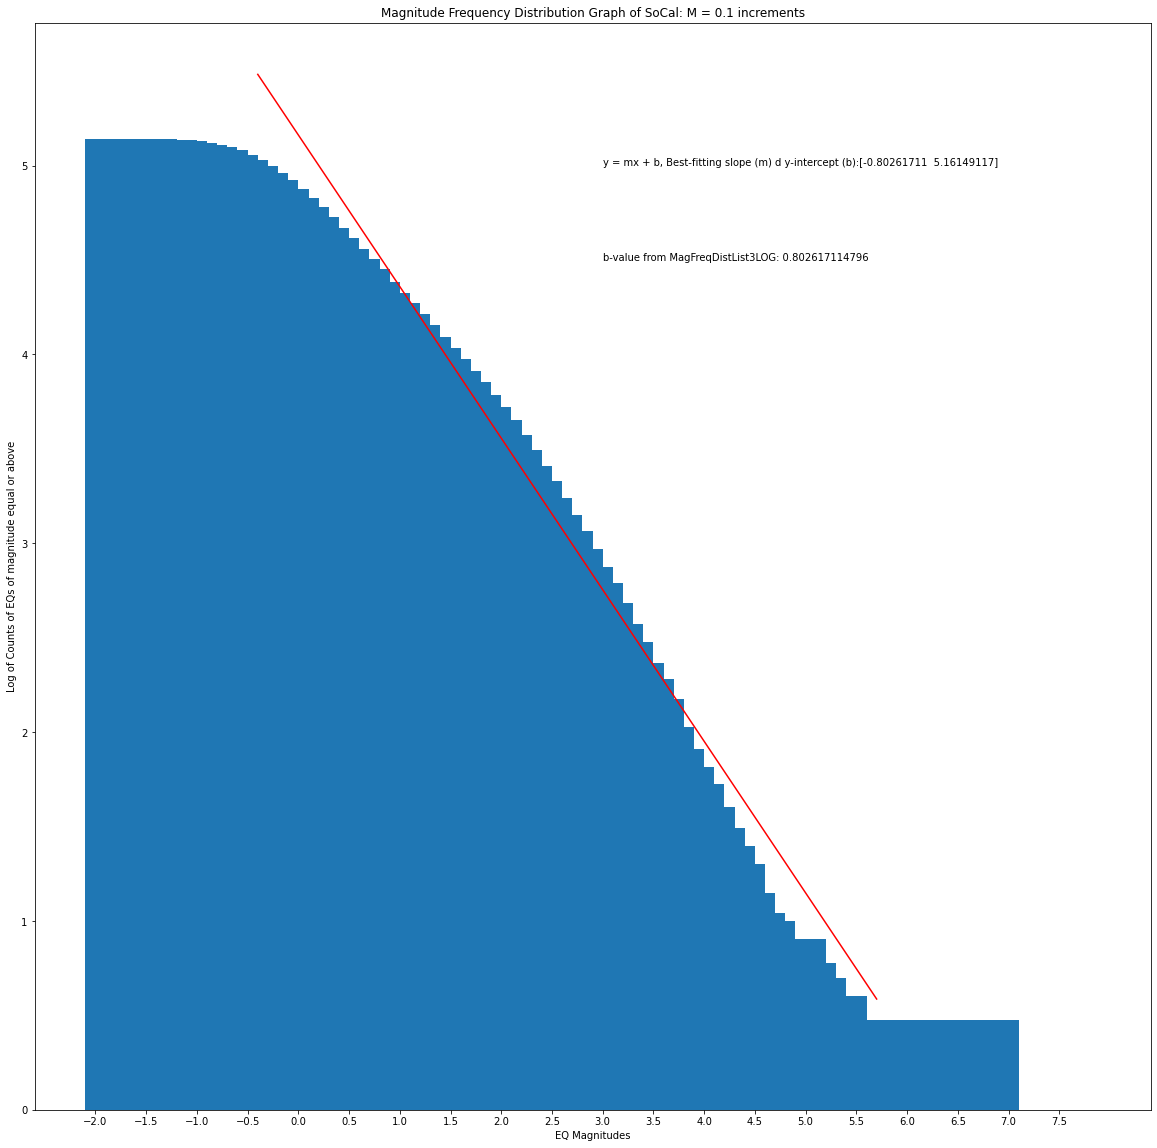

In [14]:
# 2/16 best-fit line 2
# UPDATED 3/4

plt.figure(figsize = (20, 20));
plt.bar(x = MagList3, height = MagFreqDistList3LOG, align = "edge", width = -0.1);

# Scatter
#plt.scatter(x = MagList3, y = MagFreqDistList3LOG);

plt.xlabel("EQ Magnitudes");
plt.ylabel("Log of Counts of EQs of magnitude equal or above");
plt.xticks(np.arange(min(MagList3), max(MagList3), step = 0.5));
plt.title("Magnitude Frequency Distribution Graph of SoCal: M = 0.1 increments");

#plt.axhline(y = 1, xmin = 0, xmax = 0.1, color = "red")
#plt.plot(MagList3Trunc, MagFreqDistList3LOGTrunc, color = "red");
# Seaborn kdeplot?
#sns.kdeplot(x = MagList2, label = "Seaborn best-fit", color = "red");


#plt.plot([-2, 0], [MagFreqDistList3LOG[0], MagFreqDistList3LOG[0]], color = "red");
# Horizontal line
#plt.plot([1, 6.5], [MagFreqDistList3LOGTrunc[0], MagFreqDistList3LOGTrunc[-9]], color = "red")
# Second best-fit line

# np.polyfit
M_B_2 = np.polyfit(MagList3Trunc, list(MagFreqDistList3LOGTrunc), 1) 
# "polynomial" regression line, 1 degree
# (x, y, 1)
Model2 = np.polyval(M_B_2, MagList3Trunc)
plt.plot(MagList3Trunc, Model2, "r-");
# (, x)

print("y = mx + b, Best-fitting slope (m) d y-intercept (b:", M_B_2)
print("b-value from MagFreqDistList3LOGTrunc: ", -M_B_2[0])
plt.text(3, 5, "y = mx + b, Best-fitting slope (m) d y-intercept (b):"+str(M_B_2))
plt.text(3, 4.5, "b-value from MagFreqDistList3LOG: "+str(-M_B_2[0]))

plt.savefig("Magnitude Frequency/" + "MagFreqDistGreater_4png", facecolor = "white");

In [15]:
type(MagList3) # list
type(MagFreqDistList3LOG) # array

MagFreqDistList3LOG[-24]

0.6020599913279624

In [16]:
# B-value

# y = mx + b
# m = (y2-y1)/(x2-x1)
b_value = (MagFreqDistList3LOG[-9]-MagFreqDistList3LOG[0])/(6.5-1)
print(b_value)

-0.848011254971


In [17]:
# Throwaway test cell

Tester = UTCDateTime(2010, 4, 4, 22, 40, 42.222333)
type(Tester)
Tester.timestamp # This is the attribute I need
#type(QTM_TEST['MINUTE'][500000])
#print(type(UTCDateTime().timestamp))
#print(UTCDateTime()+5000)
#QTM_TEST_2.head()
#print(QTM_Range["YEAR"].index)
#QTM_Range["TIMESTAMP"]
MagFreqDistList2
MagFreqDistList2LOG.tolist()
LogTemp = MagFreqDistList2LOG[1:].tolist()
#LogTemp